# Backtesting_Project:

## Initialization/Dependencies:

In [1]:
# Initialization Cell:

# All module imports:

import pickle
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

#from pandas.plotting import bootstrap_plot
#import matplotlib
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#from pandas_datareader.data import Options

# Jupyter notebook styles:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#matplotlib.use("TKAgg")
#matplotlib.rcParams['backend'] = "Qt4Agg"
#from pandas.plotting import autocorrelation_plot

# Setting the Seaborn style for graphics:
import seaborn as sns
sns.set()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Verification for Quandl API:
 # NOTE: a user needs to get this key from:
    # https://docs.quandl.com/docs#section-authentication
import quandl
quandl.ApiConfig.api_key = ''

## Main Module:

In [2]:
# This API offers various methods related to price performance, data retrieval,etc. for 
# a given portfolio of financial securities:


# Fetch all available data (i.e. variables) for a given period.
# Chaching (only downloading the data once and saving it) implemented as in: 
# https://blog.patricktriest.com/analyzing-cryptocurrencies-python/
    
def Get_All_Data(ticker):
    '''
    Query from Quandl for data on given securities and cache it all
    in a local file (using 'pickle' library) under the same filename as the tickers.
    
    '''
    cache_path = '{}.pkl'.format(ticker).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        dat = pickle.load(f)   
        print('Loaded {} from cache'.format(ticker))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(ticker))
            
    # Get data from Quandl in the form of Pandas dataframe:
        dat = quandl.get(ticker, start_date = start,
                         end_date = end, returns="pandas")
        dat.to_pickle(cache_path)
        print('Cached {} at {}'.format(ticker, cache_path))
    return dat

#https://stackoverflow.com/questions/16597265/appending-to-an-empty-data-frame-in-pandas
def Get_This(this):
    '''
    Get a certain market variable for the portfolio such as: Open, Close prices,etc.
    Make sure the ticker is a list of string(s) in the correct format
    for querying from Quandl, that is: 'Datasource/Security' ,e.g. 'WIKI/AAPL'.
    Returns the variable for all securities over the given period.
    
    '''
    # an empty DataFrame object to append to
    A = pd.DataFrame() 
    # different treatment according to the number of securities as Quandlt has different treatment for column headings!
    if len(ticker) > 1: 
        for i in range(len(ticker)):
            # this is how columns are named in the cached data from 'Get_All_Data()'
            A[i] = Get_All_Data(ticker)[ticker[i] + ' - ' + this] 
            i += 1
        # changing column headings to represent each security in the correct/user-friendly format!
        A.columns = ticker   
        return A
    # no need to change the way we ask for 'this' when there is only one security in portfolio.
    elif len(ticker)==1 : 
        return Get_All_Data(ticker)[this]

def Freq_Return(freq, this):
    '''
    Calculate the return of given frequency ('freq' i.e. daily,monthly,etc) 
    -over the user-specified time period.

    '''
    dat = Get_This(this)
    dat_1 = dat.pct_change(freq)
    return dat_1

# Calculate the 'Holding Period Return' for given start/end dates:
def HP_Return(start, end, this):
        _start_returns = Get_This(this).loc[start,:]
        _end_returns = Get_This(this).loc[end,:]
        _HP_return = np.sum(((_end_returns - _start_returns)/_start_returns)*weights)
        #return _HP_return
        print('Holding Period Return is : {0}'.format(_HP_return*100) + ' %')
        
# Return a pie chart of asset allocation for both start/end dates :       
def Asset_Pie(start, end, this):
        # starting asset allocation:
        _weights_start = weights
        explode = [0.05]*(len(ticker))   # 'Explode' all pieces (i.e. in total there are: len(ticker) pieces)
        
        fig1, ax1 = plt.subplots()
        
        ax1.pie(_weights_start, explode = explode, labels=ticker, autopct='%1.1f%%', 
                shadow=False, startangle=90)
        ax1.axis('equal')   # Equal aspect ratio ensures that pie is drawn as a circle
        plt.title('Beginning Asset Allocation Pie Chart (no rebalancing and one unit of each security)')
        # ending asset allocation:
        _weights_end = (Get_This(this).loc[end,:])/ np.cumsum(Get_This(this).loc[end,:])
        
        fig2, ax2 = plt.subplots()
        
        ax2.pie(_weights_end, explode = explode, labels=ticker, autopct='%1.1f%%', 
                shadow=False, startangle=90)
        ax2.axis('equal')
        plt.title('Ending Asset Allocation Pie Chart')
       
        plt.show()

## Example 1:

#### Introduction:

In [3]:
# We call all the functions (in the order defined above) on Apple Inc's stock (Quandl ticker: 'WIKI/AAPL'):

start = datetime.datetime(2015, 1, 2)
end =  datetime.datetime(2017, 12, 1)   # Also could try: pd.to_datetime('today') for up-to-date values
this = 'Adj. Open'
ticker = ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK']
weights = [0.5, 0.3, 0.2]  

Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache


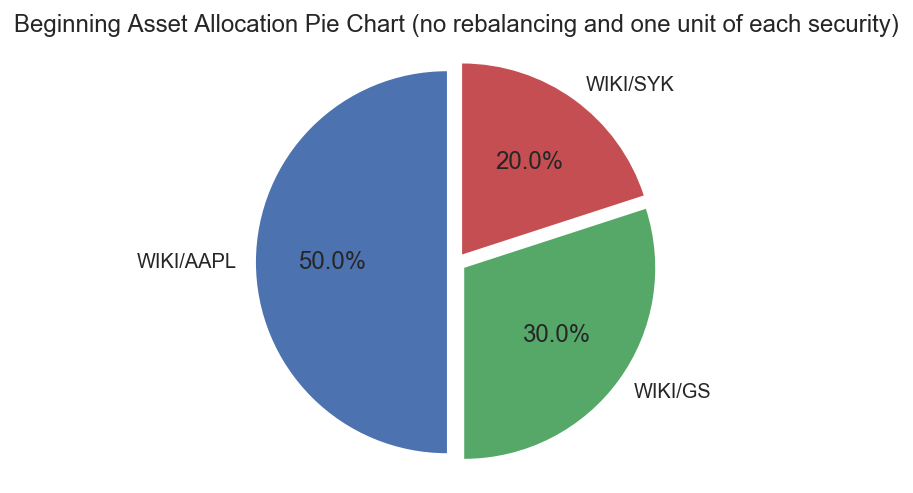

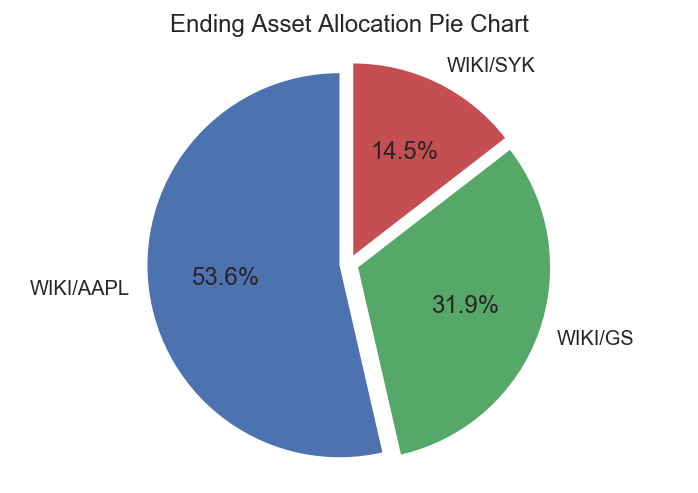

In [4]:
Asset_Pie(start, end, this)

In [5]:
# Query from Quandl and cache the data in a file:
Get_All_Data(ticker).head()

Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache


,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/SYK - Low,WIKI/SYK - Close,WIKI/SYK - Volume,WIKI/SYK - Ex-Dividend,WIKI/SYK - Split Ratio,WIKI/SYK - Adj. Open,WIKI/SYK - Adj. High,WIKI/SYK - Adj. Low,WIKI/SYK - Adj. Close,WIKI/SYK - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,53204626.0,0.0,1.0,105.820966,105.868466,101.982949,...,93.13,93.99,1524254.0,0.0,1.0,91.181860,91.903998,89.670187,90.498237,1524254.0
2015-01-05,108.29,108.65,105.410,106.25,64285491.0,0.0,1.0,102.875953,103.217954,100.139941,...,90.82,92.54,1825503.0,0.0,1.0,87.446004,90.228639,87.446004,89.102105,1825503.0
2015-01-06,106.54,107.43,104.630,106.26,65797116.0,0.0,1.0,101.213446,102.058949,99.398938,...,91.57,92.41,1854966.0,0.0,1.0,89.275418,89.978298,88.168141,88.976935,1854966.0
2015-01-07,107.20,108.20,106.695,107.75,40105934.0,0.0,1.0,101.840448,102.790453,101.360696,...,92.95,94.16,1145421.0,0.0,1.0,89.612416,90.970034,89.496874,90.661922,1145421.0
2015-01-08,109.23,112.15,108.700,111.89,59364547.0,0.0,1.0,103.768957,106.542969,103.265455,...,95.03,95.76,1368804.0,0.0,1.0,91.499601,92.433565,91.499601,92.202481,1368804.0


In [6]:
# take a look at summary statistics for different variables saved in the DataFrame: 
Get_All_Data(ticker).describe()

Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache


,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/SYK - Low,WIKI/SYK - Close,WIKI/SYK - Volume,WIKI/SYK - Ex-Dividend,WIKI/SYK - Split Ratio,WIKI/SYK - Adj. Open,WIKI/SYK - Adj. High,WIKI/SYK - Adj. Low,WIKI/SYK - Adj. Close,WIKI/SYK - Adj. Volume
count,734.000000,734.000000,734.000000,734.000000,7.340000e+02,734.000000,734.0,734.000000,734.000000,734.000000,...,735.000000,735.000000,7.350000e+02,735.000000,735.0,735.000000,735.000000,735.000000,735.000000,7.350000e+02
mean,123.685153,124.662351,122.650276,123.700472,3.938960e+07,0.008297,1.0,120.975674,121.929139,119.967085,...,113.446259,114.331728,1.337168e+06,0.005789,1.0,112.368459,113.169947,111.572454,112.442618,1.337168e+06
std,20.614197,20.588960,20.553094,20.593004,1.995483e+07,0.067557,0.0,21.524920,21.507645,21.465824,...,19.105025,19.164296,6.308282e+05,0.047161,0.0,20.124165,20.145419,20.059993,20.129145,6.308282e+05
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07,0.000000,1.0,87.955883,89.587953,87.437920,...,86.680000,87.530000,4.435670e+05,0.000000,1.0,86.039359,86.469409,84.719887,85.550666,4.435670e+05
25%,108.910000,109.925000,107.882500,108.882500,2.569408e+07,0.000000,1.0,105.850706,106.868823,104.867712,...,95.790000,96.610000,9.427500e+05,0.000000,1.0,93.766432,94.390087,92.936985,93.868227,9.427500e+05
50%,118.130000,119.300000,117.325000,118.640000,3.409162e+07,0.000000,1.0,115.169753,115.831565,114.320318,...,111.040000,111.770000,1.195539e+06,0.000000,1.0,110.010837,111.062861,109.130718,110.050327,1.195539e+06
75%,139.287500,139.942500,138.782500,139.475000,4.815227e+07,0.000000,1.0,138.159251,138.808946,137.658342,...,129.736550,130.500000,1.549674e+06,0.000000,1.0,129.348944,130.075740,128.555660,129.601956,1.549674e+06
max,175.110000,176.095000,174.645900,175.880000,1.622063e+08,0.630000,1.0,175.110000,176.095000,174.645900,...,156.020000,159.740000,6.550017e+06,0.425000,1.0,159.490000,160.620000,156.020000,159.740000,6.550017e+06


In [7]:
Get_All_Data(ticker).info()

Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 735 entries, 2015-01-02 to 2017-12-01
Data columns (total 36 columns):
WIKI/AAPL - Open           734 non-null float64
WIKI/AAPL - High           734 non-null float64
WIKI/AAPL - Low            734 non-null float64
WIKI/AAPL - Close          734 non-null float64
WIKI/AAPL - Volume         734 non-null float64
WIKI/AAPL - Ex-Dividend    734 non-null float64
WIKI/AAPL - Split Ratio    734 non-null float64
WIKI/AAPL - Adj. Open      734 non-null float64
WIKI/AAPL - Adj. High      734 non-null float64
WIKI/AAPL - Adj. Low       734 non-null float64
WIKI/AAPL - Adj. Close     734 non-null float64
WIKI/AAPL - Adj. Volume    734 non-null float64
WIKI/GS - Open             735 non-null float64
WIKI/GS - High             735 non-null float64
WIKI/GS - Low              735 non-null float64
WIKI/GS - Close            735 non-null float64
WIKI/GS - Volume           735 non-null float64
WIKI/

-----

In [8]:
print(Get_This(this).head())

Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
             WIKI/AAPL     WIKI/GS   WIKI/SYK
Date                                         
2015-01-02  105.820966  188.046317  91.181860
2015-01-05  102.875953  185.889513  87.446004
2015-01-06  101.213446  181.306305  89.275418
2015-01-07  101.840448  179.910160  89.612416
2015-01-08  103.768957  182.317307  91.499601


Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache


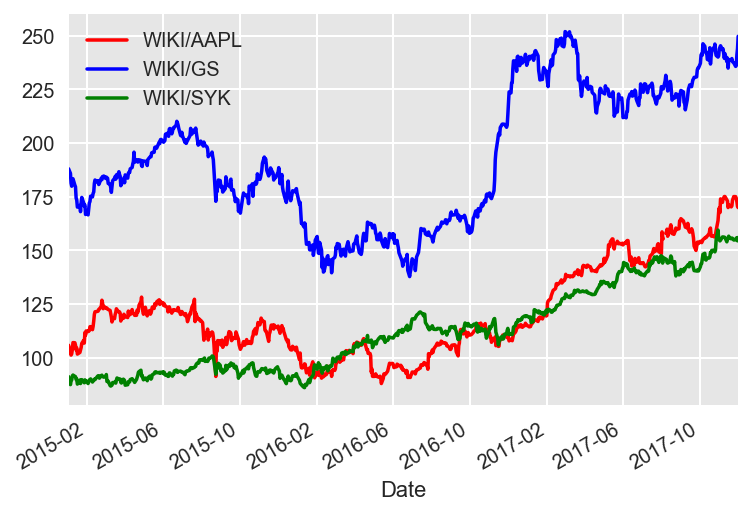

In [9]:
Get_This(this).plot(color= ['r', 'b', 'g'], sharex= True)

In [10]:
HP_Return(start, end, this)

Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Holding Period Return is : 54.377714859350455 %


#### 30-Day Returns:

In [11]:
# comparing returns for all securities:

adj_freq = Freq_Return(30, this)

adj_freq.info()

Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 735 entries, 2015-01-02 to 2017-12-01
Data columns (total 3 columns):
WIKI/AAPL    704 non-null float64
WIKI/GS      705 non-null float64
WIKI/SYK     705 non-null float64
dtypes: float64(3)
memory usage: 23.0 KB


In [12]:
adj_freq.describe()

,WIKI/AAPL,WIKI/GS,WIKI/SYK
count,704.000000,705.000000,705.000000
mean,0.022042,0.017666,0.024488
std,0.082170,0.092013,0.045558
min,-0.237795,-0.215681,-0.097155
25%,-0.032553,-0.028344,-0.007206
50%,0.026801,0.015222,0.026016
75%,0.080720,0.060981,0.055153
max,0.210658,0.377753,0.139667


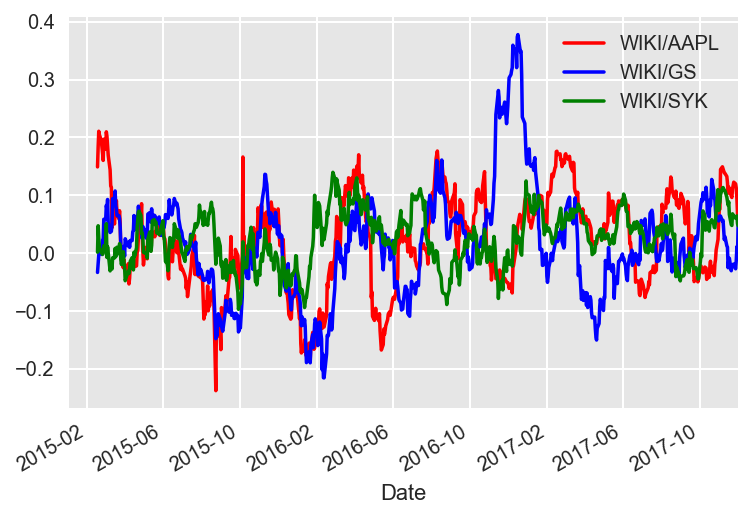

In [13]:
adj_freq.plot(color= ['r', 'b', 'g'], subplots=False, sharex= True)

# Interesting! It seems like the monthly returns were convergent for 
# all stocks at least during some periods such as: 2015-05 to 2016-09. 
# Why? similar Betas (i.e. exposure to market risk) perhaps!? Investigate further!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112e552b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1131c1c88>]], dtype=object)

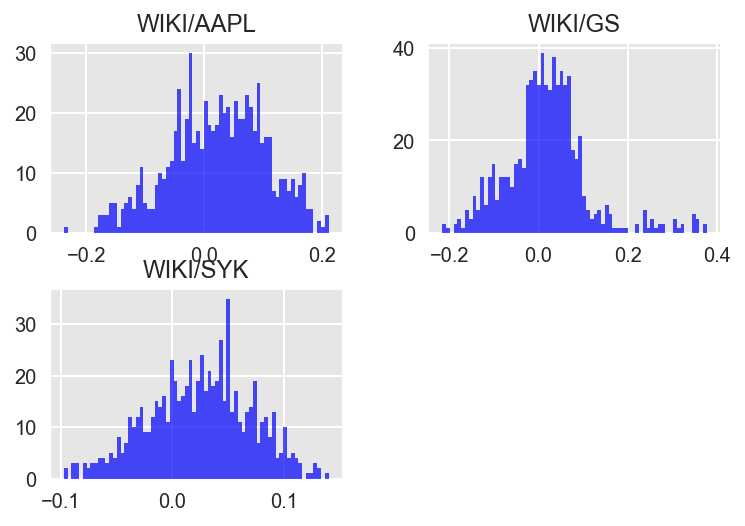

In [14]:
# histogram of 30-day returns for the securities:
pd.DataFrame.hist(adj_freq, bins=70, color= 'b', alpha= 0.7)
# based on the distribution of 30-day returns it appears that
# Apple has performed better over the period using this return. 

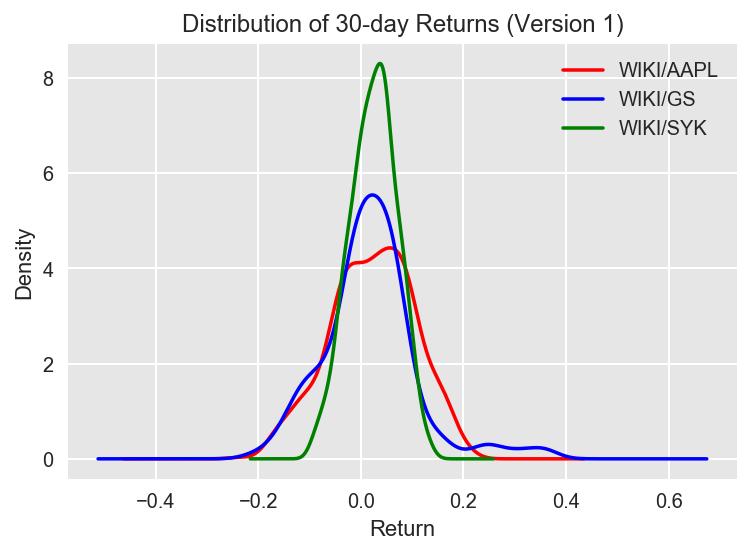

In [15]:
# density plot of 30-day returns:
adj_freq.plot.density(color = ['r', 'b', 'g']) 
plt.xlabel('Return')
plt.title('Distribution of 30-day Returns (Version 1)')

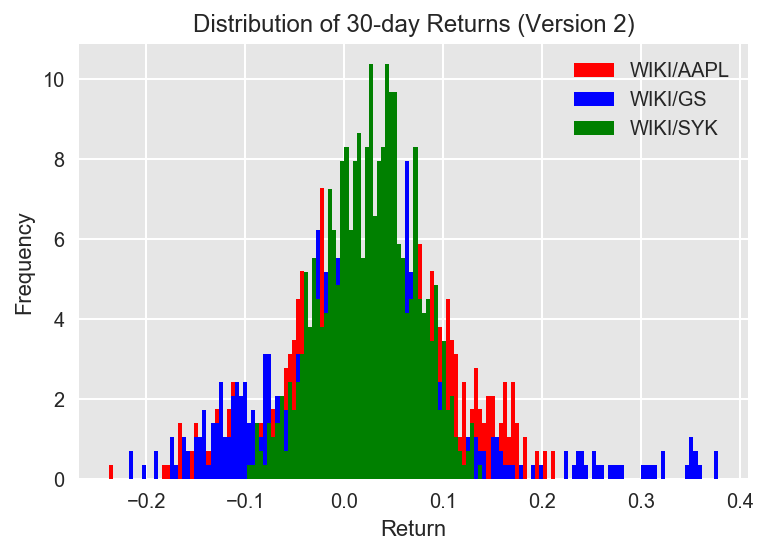

In [16]:
# we can replicate the above distribution using histograms(alternative):
adj_freq.plot(kind= 'hist', normed=True, cumulative=False, bins=150, color = ['r', 'b', 'g'])
plt.xlabel('Return')
plt.title('Distribution of 30-day Returns (Version 2)')
# interestingly it seems that based on 30-day returns Stryker
# has done a better job as it has a 'slimmer' pdf!

In [17]:
# a simple correlation matrix for 30-day returns:
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.corr.html
adj_freq.corr(method='pearson', min_periods=30)
# interesting that WIKI/SYK and WIKI/GS show -ve correlation.
# although the value is small, we are interested in such 
# -ve correlations in a portfolio management context.

,WIKI/AAPL,WIKI/GS,WIKI/SYK
WIKI/AAPL,1.000000,0.278155,0.229194
WIKI/GS,0.278155,1.000000,-0.012356
WIKI/SYK,0.229194,-0.012356,1.000000


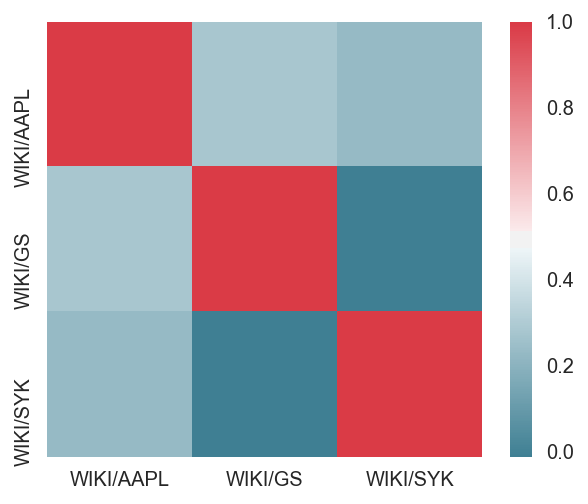

In [18]:
# visualizing the correlation matrix above:
f, ax = plt.subplots(figsize=(5, 4))
corr = adj_freq.corr(method='pearson', min_periods=30)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [19]:
# calculating the p-value along with the correlations:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
# Note: done for SYK/GS pair only!
from scipy import stats
a= adj_freq.loc[:, 'WIKI/SYK'].dropna()
b= adj_freq.loc[:, 'WIKI/GS'].dropna()
stats.pearsonr(a,b)
# second value returned is the two-tailed p-value

(-0.012356227327317221, 0.74328153993747481)

#### Adjusted Trading Volume:

In [20]:
# similarly, comparing the adjusted trading volume for all stocks:
vol = Get_This('Adj. Volume')
print(vol.head())

Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
Loaded ['WIKI/AAPL', 'WIKI/GS', 'WIKI/SYK'] from cache
             WIKI/AAPL    WIKI/GS   WIKI/SYK
Date                                        
2015-01-02  53204626.0  1877498.0  1524254.0
2015-01-05  64285491.0  3417017.0  1825503.0
2015-01-06  65797116.0  3430666.0  1854966.0
2015-01-07  40105934.0  1896744.0  1145421.0
2015-01-08  59364547.0  1953237.0  1368804.0


In [21]:
# get summary statistics quickly for each stock:
vol.describe()

,WIKI/AAPL,WIKI/GS,WIKI/SYK
count,7.340000e+02,7.350000e+02,7.350000e+02
mean,3.938960e+07,3.270461e+06,1.337168e+06
std,1.995483e+07,1.495852e+06,6.308282e+05
min,1.147592e+07,1.092728e+06,4.435670e+05
25%,2.569408e+07,2.283748e+06,9.427500e+05
50%,3.409162e+07,2.900633e+06,1.195539e+06
75%,4.815227e+07,3.737881e+06,1.549674e+06
max,1.622063e+08,1.246402e+07,6.550017e+06


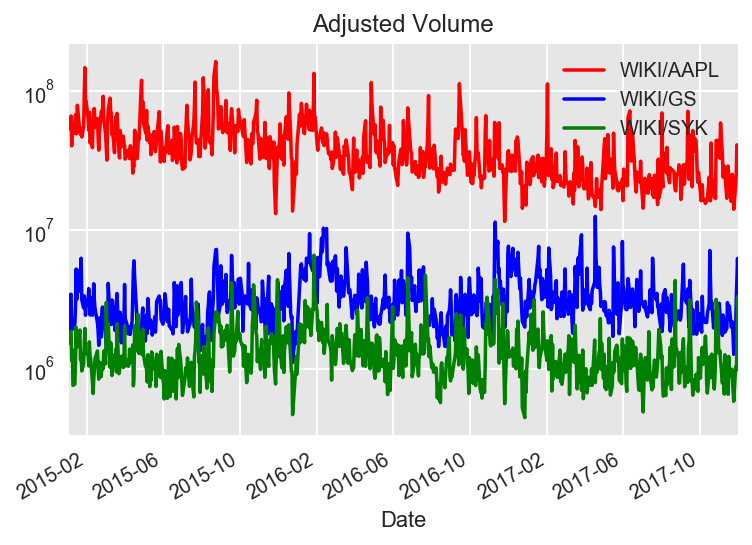

In [22]:
vol.plot(color= ['r', 'b', 'g'], subplots=False)
ax = plt.gca()
ax.set_yscale('log')
plt.title('Adjusted Volume')

# not surprisingly, Apple dominates even Goldman in popularity among traders!
# note that we have used a log scale for the y-axis to make comparison easier (as a result of Apple's dominance!)

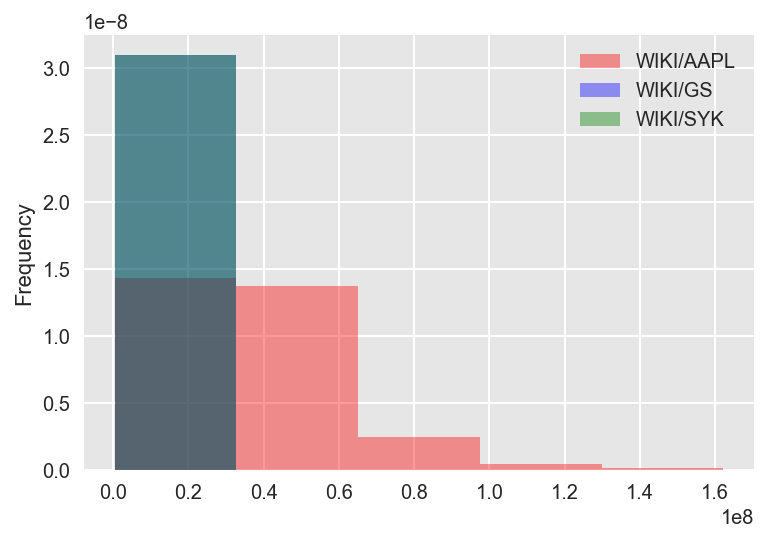

In [23]:
# histogram of trading volumes:
plt.figure()
vol.plot(kind= 'hist', bins=5, color= ['r', 'b', 'g'], alpha=0.4, normed= True)

## Example 2: